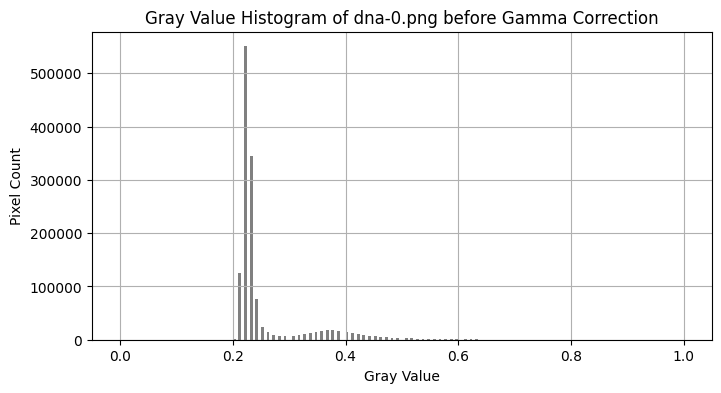

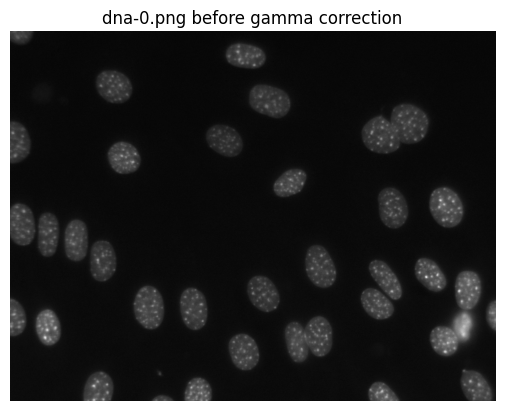

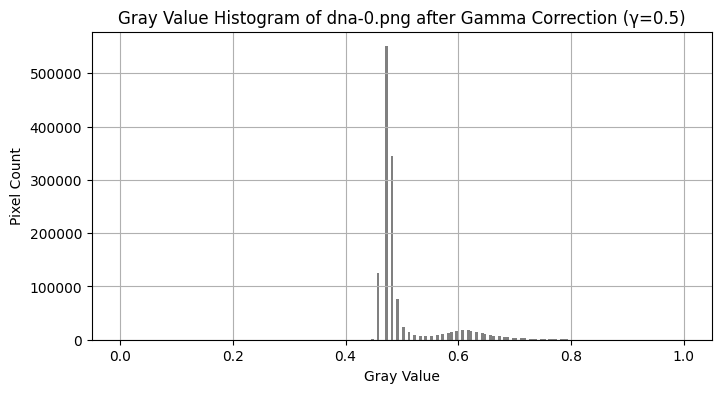

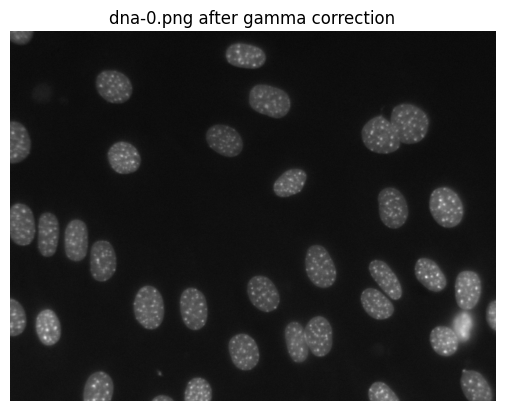

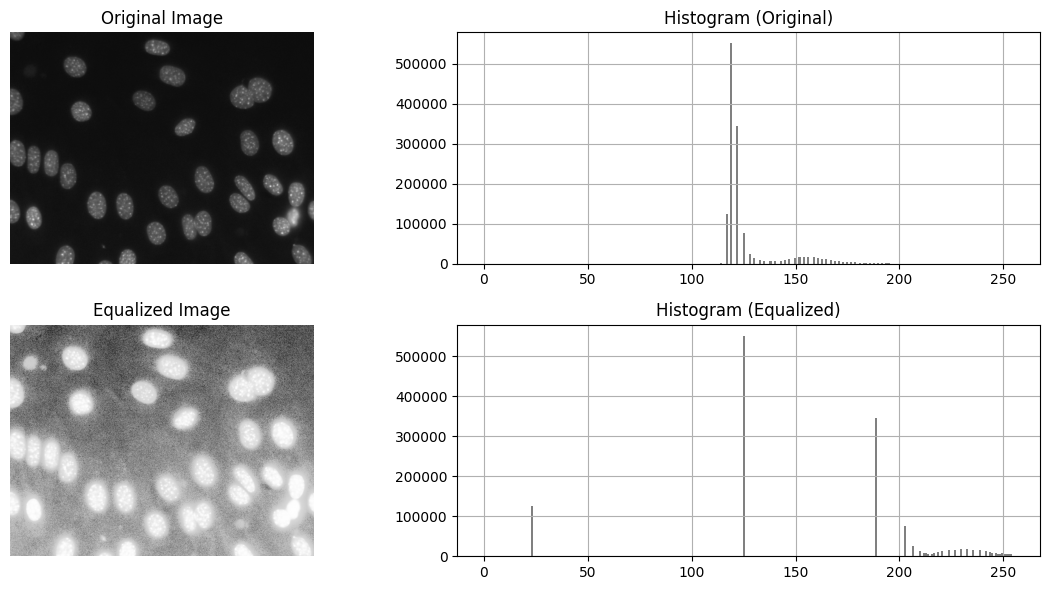

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# reads image and scales to 0-1 
image = "dna-0.png"
img = imread(image)


min = np.min(img)
max = np.max(img)

img_scaled = (img/max)

img_scaled_vector = img_scaled.flatten()
img_scaled_vector_mean = np.mean(img_scaled_vector)


# Defining gamma depending on general brightness
if img_scaled_vector_mean >= 0.5:
    gamma = 3
else:
    gamma = 0.5

# gamma transformation for bimodality enhancement
img_gamma = np.power(img_scaled, gamma)

# plots
plt.figure(figsize=(8,4))
plt.hist(img_scaled.flatten(), bins=200, range=(0, 1), color='gray')
plt.title(f'Gray Value Histogram of {image} before Gamma Correction')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.show()

plt.imshow(img_scaled, cmap='gray')  
plt.title(f'{image} before gamma correction')
plt.axis('off') 
plt.show()

plt.figure(figsize=(8,4))
plt.hist(img_gamma.flatten(), bins=200, range=(0, 1), color='gray')
plt.title(f'Gray Value Histogram of {image} after Gamma Correction (γ={gamma})')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.show()

plt.imshow(img_gamma, cmap='gray')  
plt.title(f'{image} after gamma correction')
plt.axis('off')
plt.show()


# convert to 8bit
img_gamma_8bit = (img_gamma * 255).astype(np.uint8)

# Compute histogram
hist, bins = np.histogram(img_gamma_8bit.flatten(), bins=256, range=[0, 256])

# Compute cumulative distribution function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to [0, 255]

# Use CDF as a lookup table
img_gamma_eq = cdf_normalized[img_gamma_8bit]

# Convert to uint8
img_gamma_eq = img_gamma_eq.astype(np.uint8)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img_gamma_8bit, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram (Original)")
plt.hist(img_gamma_8bit.flatten(), bins=256, range=(0, 255), color='gray')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(img_gamma_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram (Equalized)")
plt.hist(img_gamma_eq.flatten(), bins=256, range=(0, 255), color='gray')
plt.grid(True)

plt.tight_layout()
plt.show()

